<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

,Day,Owner,Loss,Min-Latency,Max-Latency,Latency,Jitter
,datetime64[ns],object,float16,float16,float16,float32,float32
,,,,,,,
,datetime64[ns],object,float16,float16,float16,float32,float32
,,,,,,,
0,2020-08-08 03:32:04,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000
1,2020-08-08 03:32:04,pomeroy-k12,100.00000,0.000000,0.000000,0.000000,0.000000
2,2020-08-08 03:32:07,lakestevens-k12,0.00000,3.214844,19.906250,8.785000,16.686001
3,2020-08-08 03:32:09,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000
4,2020-08-08 03:32:09,pomeroy-k12,100.00000,0.000000,0.000000,0.000000,0.000000
5,2020-08-08 03:32:12,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000

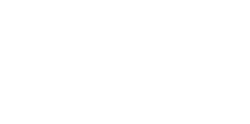
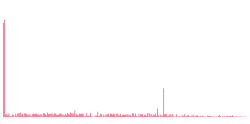
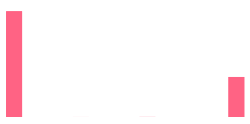
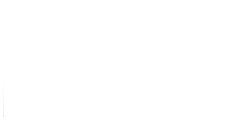
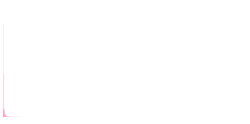
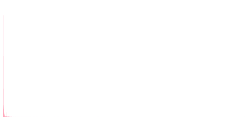
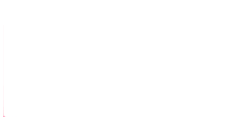
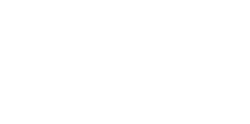
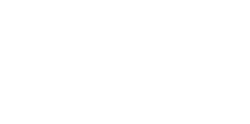
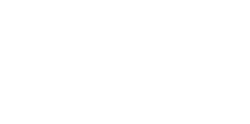
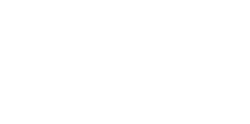
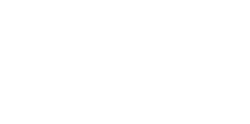
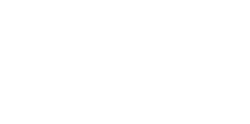
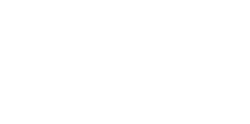

<JupyterRequire.display.SafeScript object>

,Day,Owner,Loss,Min-Latency,Max-Latency,Latency,Jitter
0,2020-08-08 03:32:04,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
1,2020-08-08 03:32:04,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
2,2020-08-08 03:32:07,lakestevens-k12,0.0,3.214844,19.906250,8.785,16.686001
3,2020-08-08 03:32:09,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
4,2020-08-08 03:32:09,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...
1899912,2020-08-16 03:14:01,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
1899913,2020-08-16 03:14:01,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
1899914,2020-08-16 03:14:02,loonlake-k12,0.0,3.611328,6.496094,4.869,2.887000
1899915,2020-08-16 03:14:03,kelso-k12,0.0,3.287109,7.742188,4.840,4.455000


In [1]:
import pandas as pd
import numpy as np
import gzip
import glob
from multiprocessing.dummy import Pool as ThreadPool
from multiprocessing import  Pool
from datetime import datetime
from jupyter_datatables import init_datatables_mode
init_datatables_mode()

start_time_archives = datetime.now()
print("\n--- Start time: " + str(datetime.now()))

df28 = pd.read_csv('2020_August2.csv',na_filter=False,engine = 'c')
df28.drop("Unnamed: 0",axis="columns",inplace=True)
df28[df28.data1 != 'Month Day TimeData']
df30 = df28

df30 = df30["data1"].str.lstrip().str.split(",|   |seacore1\/68.179.203.66|pdxcore1\/68.179.203.69|spocore1\/68.179.203.74|seacore2\/68.179.203.67|cscript:|cscript.crypto:|Owner|Test|icmp-test Loss%|Min-RTT|MaxRTT|Avg-RTT|Jitter|RPM_TEST_RESULTS:|=", expand=True)

print("\n--- Archive time: " + str(datetime.now() - start_time_archives))

df30.drop([1,2,3,4,6,7,8,10,12,14,16],axis="columns",inplace=True)
df30.insert(0, "Year", "2020", allow_duplicates=True)
df30.columns = [
    "Year",
    "Day",    
    "Owner",
    "Loss",
    "Min-Latency",
    "Max-Latency",
    "Latency",
    "Jitter"
]
df30["Day"] = df30["Year"].str.cat(df30["Day"],sep=" ")
df30.drop("Year",inplace=True,axis="columns")
df30["Min-Latency"] = pd.to_numeric(df30["Min-Latency"], errors='coerce')
df30["Max-Latency"] = pd.to_numeric(df30["Max-Latency"], errors='coerce')
df30["Latency"] = pd.to_numeric(df30["Latency"], errors='coerce')
df30["Jitter"] = pd.to_numeric(df30["Jitter"], errors='coerce')
df30["Min-Latency"].fillna(0,inplace=True)
df30["Max-Latency"].fillna(0,inplace=True)
df30["Latency"].fillna(0,inplace=True)
df30["Jitter"].fillna(0,inplace=True)
df30["Loss"] = df30["Loss"].astype("float16")
df30["Min-Latency"] = df30["Min-Latency"].astype("float16")
df30["Max-Latency"] = df30["Max-Latency"].astype("float16")
df30["Latency"] = df30["Latency"].astype("float32")
df30["Jitter"] = df30["Jitter"].astype("float32")
df30["Day"] = pd.to_datetime(df30["Day"], format='%Y %b %d %H:%M:%S',errors='coerce')
routerjitter = df30[df30.Jitter > 2.0]
routerrtt = df30[df30.Latency > 28.0]
routerloss = df30[df30.Loss > 75.0]
df30["Min-Latency"] = pd.to_numeric(df30["Min-Latency"], errors='coerce')
df30["Max-Latency"] = pd.to_numeric(df30["Max-Latency"], errors='coerce')
df30["Latency"] = pd.to_numeric(df30["Latency"], errors='coerce')
df30["Jitter"] = pd.to_numeric(df30["Jitter"], errors='coerce')
df30.dropna(how='any',inplace=True)

print("\n--- Archive time: " + str(datetime.now() - start_time_archives))

df30

,Day,Owner,Loss,Min-Latency,Max-Latency,Latency,Jitter
,datetime64[ns],object,float16,float16,float16,float32,float32
,,,,,,,
,datetime64[ns],object,float16,float16,float16,float32,float32
,,,,,,,
0,2020-08-08 03:32:04,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000
1,2020-08-08 03:32:04,pomeroy-k12,100.00000,0.000000,0.000000,0.000000,0.000000
2,2020-08-08 03:32:07,lakestevens-k12,0.00000,3.214844,19.906250,8.785000,16.686001
3,2020-08-08 03:32:09,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000
4,2020-08-08 03:32:09,pomeroy-k12,100.00000,0.000000,0.000000,0.000000,0.000000
5,2020-08-08 03:32:12,pierce-puyallup-ctc,100.00000,0.000000,0.000000,0.000000,0.000000

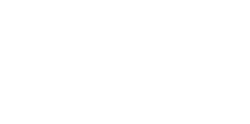
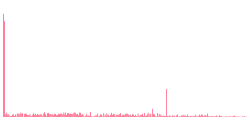
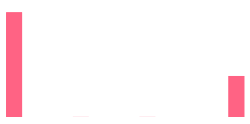
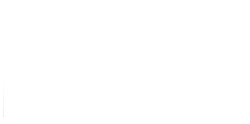
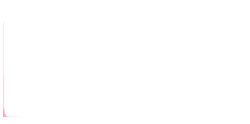
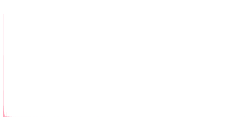
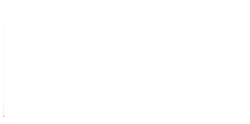
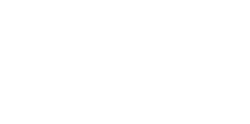
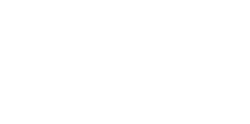
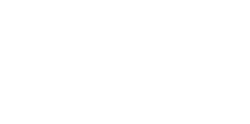
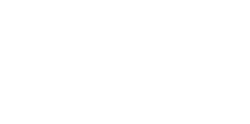
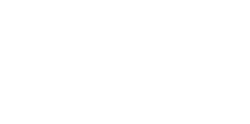
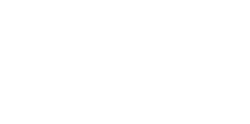
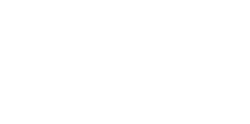

<JupyterRequire.display.SafeScript object>

,Day,Owner,Loss,Min-Latency,Max-Latency,Latency,Jitter
0,2020-08-08 03:32:04,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
1,2020-08-08 03:32:04,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
2,2020-08-08 03:32:07,lakestevens-k12,0.0,3.214844,19.906250,8.785,16.686001
3,2020-08-08 03:32:09,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
4,2020-08-08 03:32:09,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...
1899912,2020-08-16 03:14:01,pierce-puyallup-ctc,100.0,0.000000,0.000000,0.000,0.000000
1899913,2020-08-16 03:14:01,pomeroy-k12,100.0,0.000000,0.000000,0.000,0.000000
1899914,2020-08-16 03:14:02,loonlake-k12,0.0,3.611328,6.496094,4.869,2.887000
1899915,2020-08-16 03:14:03,kelso-k12,0.0,3.287109,7.742188,4.840,4.455000


In [2]:
df30